### HW3Q3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
path = 'data/marriage.csv'
df = pd.read_csv(path, header = None)
X = df.iloc[:,:-1]
y = df.iloc[:,-1:].values.ravel()

seed = 55
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### Q3.1

In [3]:
#naive bayes
nb_clf = GaussianNB(var_smoothing=1e-3 ).fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

In [4]:
#logistic regression
lr_clf = LogisticRegression().fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

In [5]:
#knn
knn_clf = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

In [6]:
print("NB Testing Accuracy:", nb_acc)
print("LR Testing Accuracy:", lr_acc)
print("KNN Accuracy:", knn_acc)

NB Testing Accuracy: 0.9705882352941176
LR Testing Accuracy: 0.9705882352941176
KNN Accuracy: 0.9705882352941176


### Q3.2

In [7]:
#PCA on the data
pca = PCA(n_components=2)
X_fit = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2, random_state=seed)

nb_clf_pca= GaussianNB().fit(X_train, y_train)
lr_clf_pca = LogisticRegression().fit(X_train, y_train)
knn_clf_pca = KNeighborsClassifier().fit(X_train, y_train)

x_min, x_max = X_fit[:, 0].min() - 1, X_fit[:, 0].max() + 1
y_min, y_max = X_fit[:, 1].min() - 1, X_fit[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

nb_Z = nb_clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
nb_Z = nb_Z.reshape(xx.shape)

lr_Z = lr_clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
lr_Z = lr_Z.reshape(xx.shape)

knn_Z = knn_clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
knn_Z = knn_Z.reshape(xx.shape)

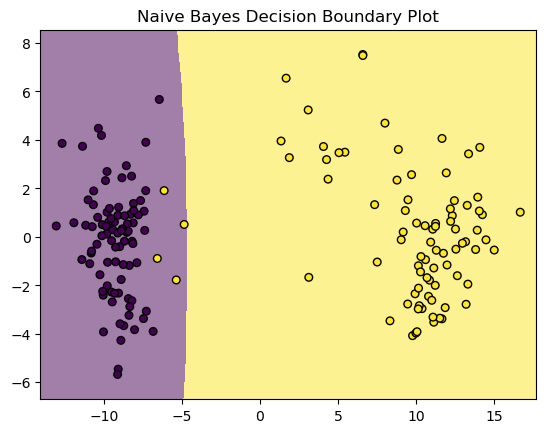

In [15]:
#plot nb
plt.pcolormesh(xx, yy, nb_Z, alpha=0.5, cmap='viridis')
plt.scatter(X_fit[:, 0], X_fit[:, 1], c=y, s=30, edgecolor='k')
plt.title("Naive Bayes Decision Boundary Plot")
plt.savefig("q3plot1")

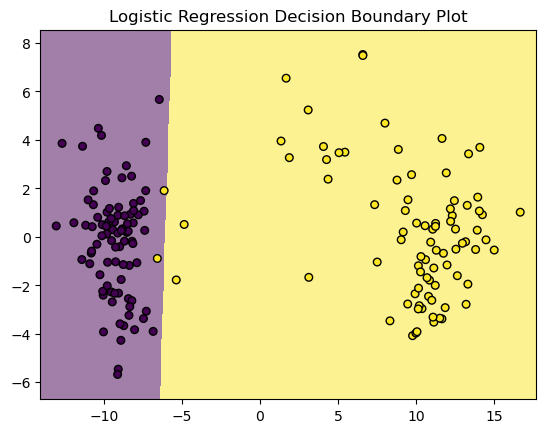

In [16]:
#plot logistic regression
plt.pcolormesh(xx, yy, lr_Z, alpha=0.5, cmap='viridis')
plt.scatter(X_fit[:, 0], X_fit[:, 1], c=y, s=30, edgecolor='k')
plt.title("Logistic Regression Decision Boundary Plot" )
plt.savefig("q3plot2")

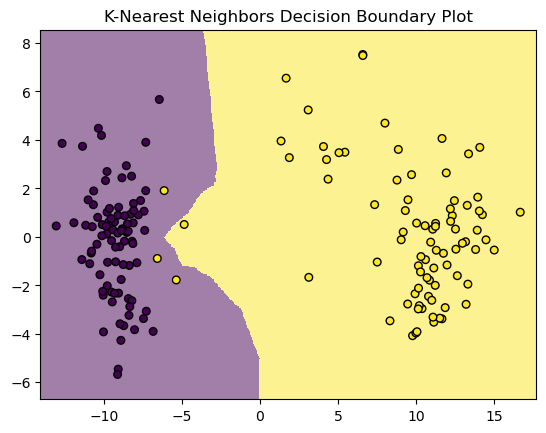

In [17]:
#plot knn
plt.pcolormesh(xx, yy, knn_Z, alpha=0.5, cmap='viridis')
plt.scatter(X_fit[:, 0], X_fit[:, 1], c=y, s=30, edgecolor='k')
plt.title("K-Nearest Neighbors Decision Boundary Plot")
plt.savefig("q3plot3")